# **Insurance Analysis**
M Ibrahim Al Muwahidan (almuwahidan@gmail.com)

Pacmann.io Proba Student

***

In [49]:
# Initialize libraries
import numpy as np
import pandas as pd
import seaborn as sns
import random
import gc

In [50]:
# Import dataset, we call them Policy Master Data
policy_master_data = pd.read_csv("../dataset/insurance.csv")
policy_master_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


***

## **1. Descriptive statistics analysis**

#### **Describing this dataset**

In [51]:
# filter datasets
smokers_data = policy_master_data.query("smoker == 'yes'")
nsmokers_data = policy_master_data.query("smoker == 'no'")
male_data = policy_master_data.query("sex == 'male'")
female_data = policy_master_data.query("sex == 'female'")
male_smokers_data = smokers_data.query("sex == 'male'")
female_smokers_data = smokers_data.query("sex == 'female'")
smokers_bmi_greaterthan25_data = smokers_data.query("bmi > 25")
nsmokers_bmi_greaterthan25_data = nsmokers_data.query("bmi > 25")


# calculate dataset attributes to get answers
smokers_bmi_mean = smokers_data["bmi"].mean()
nsmokers_bmi_mean = nsmokers_data["bmi"].mean()
smokers_charges_mean = smokers_data["charges"].mean()
nsmokers_charges_mean = nsmokers_data["charges"].mean()
male_smokers_age_mean = male_smokers_data["age"].mean()
female_smokers_age_mean = female_smokers_data["age"].mean()
smokers_bmi_greaterthan25_charges_mean = smokers_bmi_greaterthan25_data["charges"].mean()
nsmokers_bmi_greaterthan25_charges_mean = nsmokers_bmi_greaterthan25_data["charges"].mean()
male_bmi_mean = male_data["bmi"].mean()
female_bmi_mean = female_data["bmi"].mean()


print(f"1. Average age across sexes are similar for smokers ({male_smokers_age_mean:.3f} for male and {female_smokers_age_mean:.3f} for female)")
print(f"2. Average charges are *not* the same between smokers and non-smokers ({smokers_charges_mean:.3f} for smokers and {nsmokers_charges_mean:.3f} for non-smokers)")
print(f"3. For policyholders with BMI >25, average charges are *not* the same between smokers and non-smokers ({smokers_bmi_greaterthan25_charges_mean:.3f} for smokers and {nsmokers_bmi_greaterthan25_charges_mean:.3f} for non-smokers)")
print(f"4. Average BMI are similar across sexes ({male_bmi_mean:.3f} for male and {female_bmi_mean:.3f} for female)")
print(f"5. Average BMI are similar between smokers and non-smokers ({smokers_bmi_mean:.3f} for smokers and {nsmokers_bmi_mean:.3f} for non-smokers)")

1. Average age across sexes are similar for smokers (38.447 for male and 38.609 for female)
2. Average charges are *not* the same between smokers and non-smokers (32050.232 for smokers and 8434.268 for non-smokers)
3. For policyholders with BMI >25, average charges are *not* the same between smokers and non-smokers (35116.910 for smokers and 8629.590 for non-smokers)
4. Average BMI are similar across sexes (30.943 for male and 30.378 for female)
5. Average BMI are similar between smokers and non-smokers (30.708 for smokers and 30.652 for non-smokers)


***

## **2. Categorical variable analysis (PMF)**

#### **Which gender has the highest charge?**

In [52]:
print("1. Gender with the highest charges")
print("We use mean to calculate this\n")

male_charges_mean = male_data["charges"].mean()
female_charges_mean = female_data["charges"].mean()

print(f"Average charges, male: {male_charges_mean:.3f}")
print(f"Average charges, female: {female_charges_mean:.3f}")

print("\nWe can conclude that male typically have higher charges than female")

## TODO: plot for sanity check

1. Gender with the highest charges
We use mean to calculate this

Average charges, male: 13956.751
Average charges, female: 12569.579

We can conclude that male typically have higher charges than female


#### **Distribution of charge probabilities for all policyholders**

For this, we're treating the RV as 'charges' in the discrete space; thus we're plotting a PMF


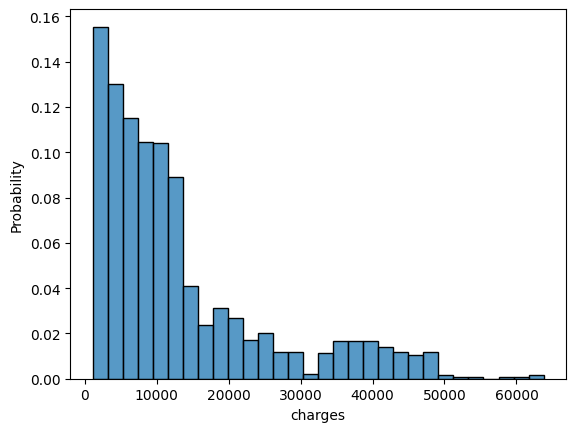

In [53]:
print("For this, we're treating the RV as 'charges' in the discrete space; thus we're plotting a PMF")

plot = sns.histplot(data=policy_master_data, x="charges", stat="probability")

#### **Proportion of policyholder count per region -- are they the same?**


All regions are the same except 'southeast' region.


<AxesSubplot: xlabel='region', ylabel='Count'>

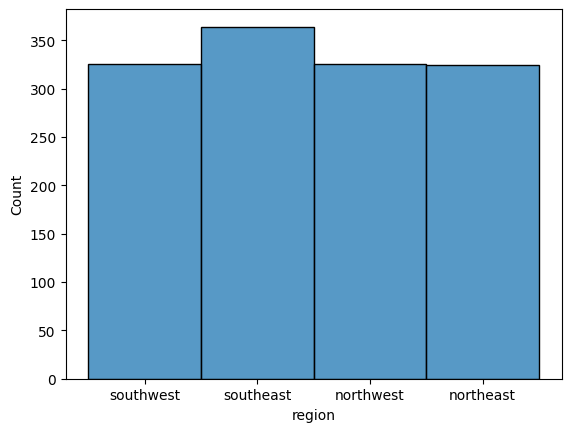

In [54]:
print("\nAll regions are the same except 'southeast' region.")

sns.histplot(data=policy_master_data, x="region", stat="count")

In [55]:
print("4. peluang seseorang adalah perempuan jika diketahui dia perokok")
print("\nWe're calculating it as = P(perempuan AND perokok) / P(perokok)")

n_female_smokers = female_smokers_data.shape[0]
n_smokers = smokers_data.shape[0]

print(f"P(perempuan | perokok) = {n_female_smokers/n_smokers:.3f}")

4. peluang seseorang adalah perempuan jika diketahui dia perokok

We're calculating it as = P(perempuan AND perokok) / P(perokok)
P(perempuan | perokok) = 0.420


5. distribusi tagihan per region


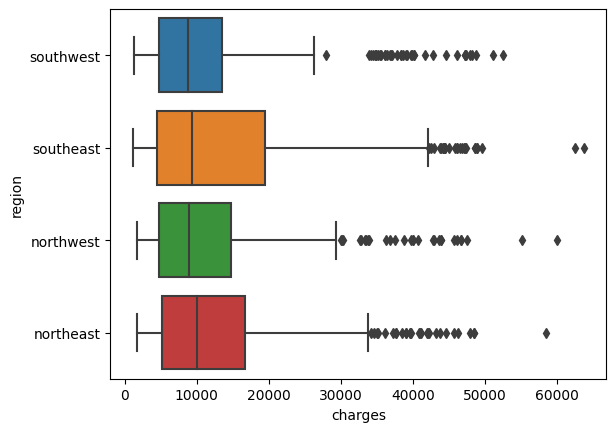

In [56]:
print("5. distribusi tagihan per region")

plot = sns.boxplot(data=policy_master_data, x="charges", y="region")

In [57]:
# deleting dataset variables we no longer use
del smokers_data
del nsmokers_data
del male_data
del female_data
del male_smokers_data
del female_smokers_data
del smokers_bmi_greaterthan25_data
del nsmokers_bmi_greaterthan25_data

gc.collect()

34525

***

## **3. Continuous variable analysis (CDF)**

#### **Probability of charges based on BMI**

Joint and marginal distributions


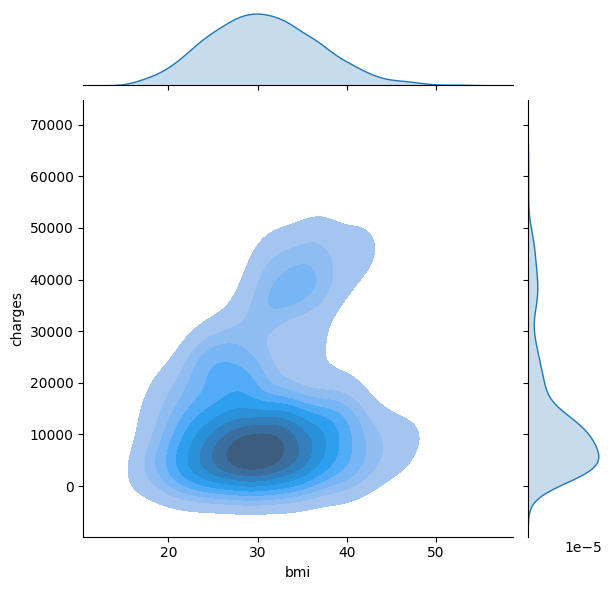

In [75]:
print("Joint and marginal distributions")
plot = sns.jointplot(data=policy_master_data, x="bmi", y="charges", kind="kde", fill=True)

In [59]:
# Prep some data
bmi_underweight = policy_master_data.query("bmi < 18.5")
bmi_normal = policy_master_data.query("bmi >= 18.5 & bmi < 25")
bmi_overweight = policy_master_data.query("bmi >= 25 & bmi < 30")
bmi_obese = policy_master_data.query("bmi >= 30")

Distribution of charges for BMI below 18.5 (underweight):


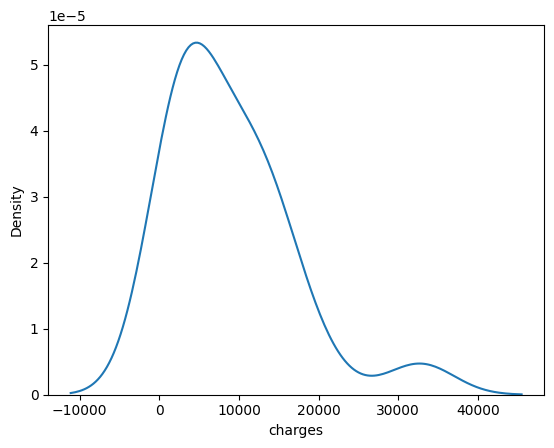

In [60]:
print("Distribution of charges for BMI below 18.5 (underweight):")
plot = sns.kdeplot(data=bmi_underweight, x="charges")

Distribution of charges for BMI between 18.5 and <25 (normal):


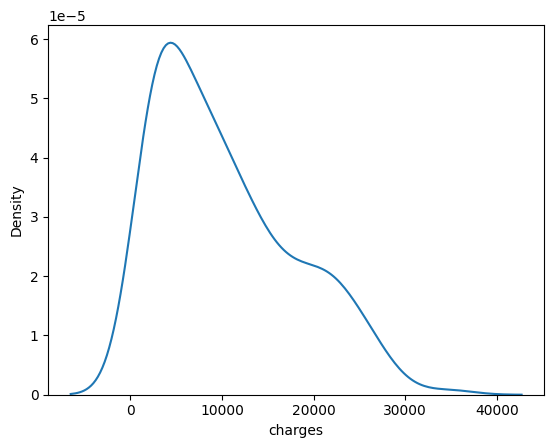

In [61]:
print("Distribution of charges for BMI between 18.5 and <25 (normal):")
plot = sns.kdeplot(data=bmi_normal, x="charges")

Distribution of charges for BMI between 25 and <30 (overweight):


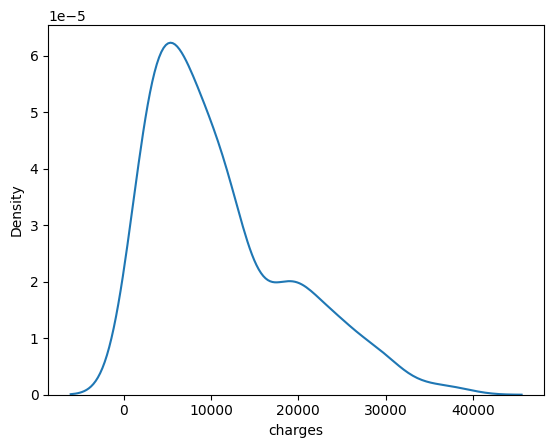

In [62]:
print("Distribution of charges for BMI between 25 and <30 (overweight):")
plot = sns.kdeplot(data=bmi_overweight, x="charges")

Distribution of charges for BMI >=30 (obese):


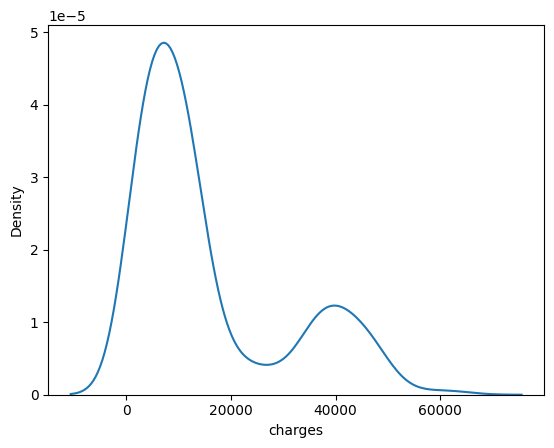

In [63]:
print("Distribution of charges for BMI >=30 (obese):")
plot = sns.kdeplot(data=bmi_obese, x="charges")

In [64]:
# deleting dataset variables we no longer use
del bmi_underweight
del bmi_normal
del bmi_overweight
del bmi_obese

gc.collect()

35790

#### **Probability of a smoker with >25 BMI will get charges >16700**

In [65]:
# Prep the data
smoker_data = policy_master_data.query("smoker == 'yes'")
highbmi_data = smoker_data.query("bmi > 25")
lowbmi_data = smoker_data.query("bmi <= 25")

highcharge_highbmi_data = highbmi_data.query("charges <= 16700")

In [66]:
print(f"P(charges > 16700 | smoker AND BMI > 25) = {highcharge_highbmi_data.shape[0] / highbmi_data.shape[0]:.3f}")

P(charges > 16700 | smoker AND BMI > 25) = 0.018


#### **Probability of a charge is >16700 given the person is a smoker**

In [67]:
n_highcharge_smoker = smoker_data.query("charges > 16700").shape[0]

print(f"P(charges >= 16700 | smoker) = {n_highcharge_smoker / smoker_data.shape[0]:.3f}")

P(charges >= 16700 | smoker) = 0.927


#### **Which segment is likelier to have charges >16700 -- people with BMI < 25 or >25?**

In [68]:
highbmi_data = policy_master_data.query("bmi > 25")
lowbmi_data = policy_master_data.query("bmi <= 25")
n_highcharge_highbmi = highbmi_data.query("charges > 16700").shape[0]
n_highcharge_lowbmi = lowbmi_data.query("charges > 16700").shape[0]

print(f"P(charges > 16700 | BMI > 25) = {n_highcharge_highbmi / highbmi_data.shape[0]:.3f}")
print(f"P(charges > 16700 | BMI <= 25) = {n_highcharge_lowbmi / lowbmi_data.shape[0]:.3f}")

print("\nWe can conclude that people with BMI >25 have more likelihood of incurring higher charges")

P(charges > 16700 | BMI > 25) = 0.259
P(charges > 16700 | BMI <= 25) = 0.206

We can conclude that people with BMI >25 have more likelihood of incurring higher charges


#### **Which segment is likelier to have charges >16700 -- smokers or non-smokers?**

In [69]:
nonsmoker_data = policy_master_data.query("smoker == 'no'")

n_highcharge_smoker = smoker_data.query("charges > 16700").shape[0]
n_highcharge_nonsmoker = nonsmoker_data.query("charges > 16700").shape[0]

print(f"P(charges > 16700 | smoker) = {n_highcharge_smoker / smoker_data.shape[0]:.3f}")
print(f"P(charges > 16700 | non-smoker) = {n_highcharge_nonsmoker / nonsmoker_data.shape[0]:.3f}")
print("\nWe can conclude that smokers have more likelihood of incurring higher charges")

P(charges > 16700 | smoker) = 0.927
P(charges > 16700 | non-smoker) = 0.075

We can conclude that smokers have more likelihood of incurring higher charges


In [70]:
# deleting dataset variables we no longer use
del smoker_data
del nonsmoker_data
del highbmi_data
del lowbmi_data

gc.collect()

3201

## **4. Correlation Analysis: factors resulting in high charges**

In [71]:
corr_table = policy_master_data.corr()
print("Correlation coefficient for 'charges' attribute:")
print(corr_table.loc['charges'])

Correlation coefficient for 'charges' attribute:
age         0.299008
bmi         0.198341
children    0.067998
charges     1.000000
Name: charges, dtype: float64


We can conclude that:
- Charges correlates positively with age (coefficient = 0.3) and bmi (coefficient = 0.2)
- Charges correlates weakly positively with number of children (coefficient = 0.07) 

Scatterplot for children and charges:


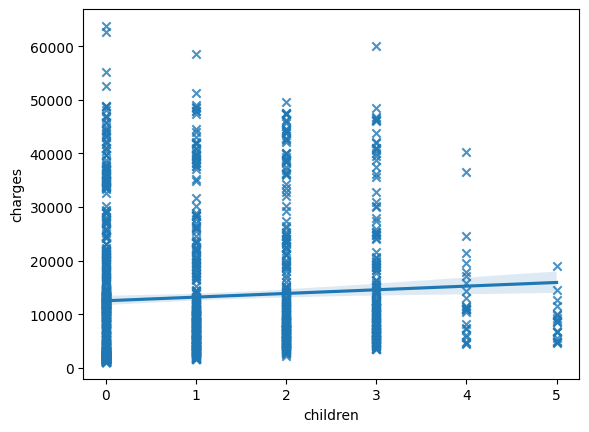

In [72]:
print("Scatterplot for children and charges:")
plot = sns.regplot(data=policy_master_data, x="children", y="charges", marker="x")

Scatterplot for bmi and charges:


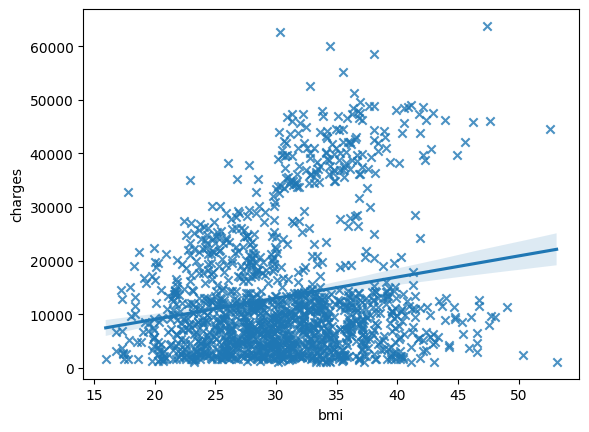

In [73]:
print("Scatterplot for bmi and charges:")
plot = sns.regplot(data=policy_master_data, x="bmi", y="charges", marker="x")

Scatterplot for age and charges:


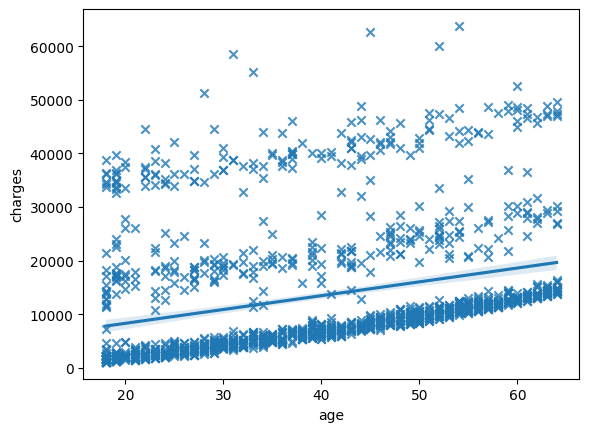

In [74]:
print("Scatterplot for age and charges:")
plot = sns.regplot(data=policy_master_data, x="age", y="charges", marker="x")